In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")   

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [37]:
train = pd.read_csv("original_set/train.csv")
test = pd.read_csv("original_set/test.csv")
test_y = pd.read_csv("original_set/test_labels.csv")

<Axes: >

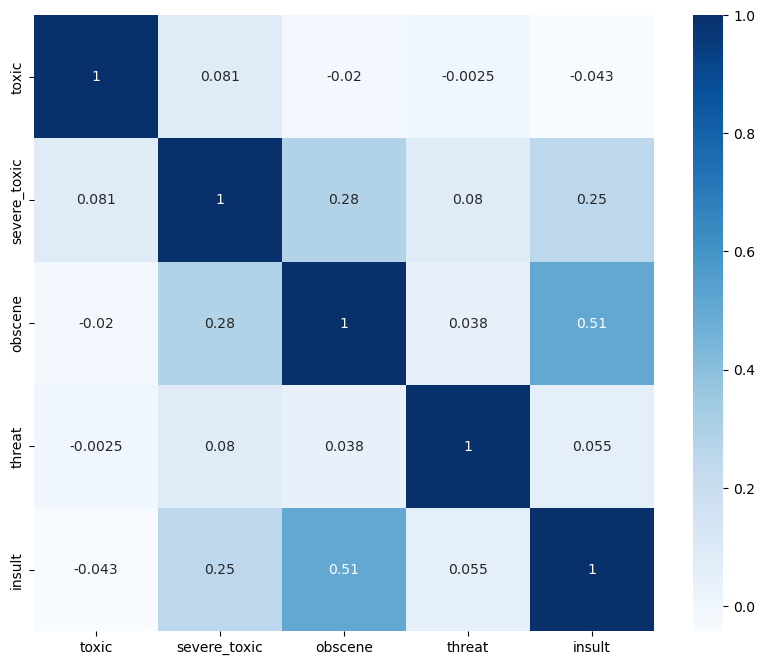

In [6]:
rowsums = train.iloc[:, 2:].sum(axis=1)
temp = train.iloc[:, 2:-1]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

In [39]:
def vector_model(df, category, vectorizer, ngram):
    X = df['comment_text'].fillna(' ')
    Y = df[category]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    vector = vectorizer(ngram_range=(ngram), stop_words='english')

    X_train_scal = vector.fit_transform(X_train)
    X_test_scal = vector.transform(X_test)
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scal, Y_train)
    Y_pred_knn = knn.predict(X_test_scal)
    print(f"Knn done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_knn)} ")
    print("\n----------------------------------------------------------------------")

    #logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_scal, Y_train)
    Y_pred_lr = lr.predict(X_test_scal)
    print(f"\nLr done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_lr)} ")
    print("\n----------------------------------------------------------------------\n")

    #Support Vector Machine
    svm = SVC(kernel='rbf')
    svm.fit(X_train_scal, Y_train)
    Y_pred_svm = svm.predict(X_test_scal)
    print(f"\nsvm done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_svm)} ")
    print("\n----------------------------------------------------------------------\n")

    #Naive Bayes
    cnb = ComplementNB()
    cnb.fit(X_train_scal, Y_train)
    Y_pred_cnb = cnb.predict(X_test_scal)
    print(f"\ncnb done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_cnb)} ")
    print("\n----------------------------------------------------------------------\n")

    bnb = BernoulliNB()
    bnb.fit(X_train_scal, Y_train)
    Y_pred_bnb = bnb.predict(X_test_scal)
    print(f"\nbnb done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_bnb)} ")
    print("\n----------------------------------------------------------------------\n")

    #Decision Tree Classifier
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, random_state=42)
    dt.fit(X_train_scal, Y_train)
    Y_pred_dt = dt.predict(X_test_scal)
    print(f"\nDT done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_dt)} ")
    print("\n----------------------------------------------------------------------\n")

    #Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=105, min_samples_split=2, random_state=42)
    rf.fit(X_train_scal, Y_train)
    Y_pred_rf = rf.predict(X_test_scal)
    print(f"\nRF done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_rf)} ")
    print("\n----------------------------------------------------------------------\n")
    
    # XGBoost Classifier
    xgb = XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    )
    xgb.fit(X_train_scal, Y_train)
    Y_pred_xgb = xgb.predict(X_test_scal)
    print(f"\nXGBoost done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_xgb)} ")
    print("\n----------------------------------------------------------------------\n")

    f1_scores = [
        round(f1_score(Y_test, Y_pred_knn), 2),
        round(f1_score(Y_test, Y_pred_lr), 2),
        round(f1_score(Y_test, Y_pred_svm), 2),
        round(f1_score(Y_test, Y_pred_cnb), 2),
        round(f1_score(Y_test, Y_pred_bnb), 2),
        round(f1_score(Y_test, Y_pred_dt), 2),
        round(f1_score(Y_test, Y_pred_rf), 2),
        round(f1_score(Y_test, Y_pred_xgb), 2)
    ]

    print(f"F1_scores for {category} category are calculated")

    Scores = {f'F1_Score - {category}': f1_scores}
    Scores_df = pd.DataFrame(
        Scores,
        index=['KNN', 'Logistic Regression', 'SVM', 'Complement NB', 'Bernoulli NB', 'Decision Tree', 'Random Forest', 'XGBoost']
    )
    
    return Scores_df


In [40]:
df_toxic = pd.read_csv('newset/Toxic.csv')
result_toxic = vector_model(df_toxic, 'toxic', TfidfVectorizer, (1,1))
result_toxic

Knn done -> It's classification report for toxic category 
               precision    recall  f1-score   support

           0       0.55      0.62      0.58      4535
           1       0.58      0.51      0.54      4642

    accuracy                           0.56      9177
   macro avg       0.56      0.56      0.56      9177
weighted avg       0.56      0.56      0.56      9177
 

----------------------------------------------------------------------

Lr done -> It's classification report for toxic category 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      4535
           1       0.92      0.85      0.88      4642

    accuracy                           0.88      9177
   macro avg       0.89      0.88      0.88      9177
weighted avg       0.89      0.88      0.88      9177
 

----------------------------------------------------------------------


svm done -> It's classification report for toxic category 
               prec

,F1_Score - toxic
KNN,0.54
Logistic Regression,0.88
SVM,0.89
Complement NB,0.88
Bernoulli NB,0.77
Decision Tree,0.83
Random Forest,0.85
XGBoost,0.85


In [41]:
df_severe_toxic = pd.read_csv('newset/Severe_toxic.csv')
result_severe_toxic = vector_model(df_severe_toxic, 'severe_toxic', TfidfVectorizer, (1,1))
result_severe_toxic

Knn done -> It's classification report for severe_toxic category 
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       476
           1       0.78      0.95      0.86       481

    accuracy                           0.84       957
   macro avg       0.86      0.84      0.84       957
weighted avg       0.86      0.84      0.84       957
 

----------------------------------------------------------------------

Lr done -> It's classification report for severe_toxic category 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       476
           1       0.96      0.89      0.93       481

    accuracy                           0.93       957
   macro avg       0.93      0.93      0.93       957
weighted avg       0.93      0.93      0.93       957
 

----------------------------------------------------------------------


svm done -> It's classification report for severe_toxic category

,F1_Score - severe_toxic
KNN,0.86
Logistic Regression,0.93
SVM,0.93
Complement NB,0.94
Bernoulli NB,0.79
Decision Tree,0.91
Random Forest,0.94
XGBoost,0.91


In [42]:
df_threat = pd.read_csv('newset/Threat.csv')
result_threat = vector_model(df_threat, 'threat', TfidfVectorizer, (1,1))
result_threat

Knn done -> It's classification report for threat category 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       200
           1       0.91      0.64      0.75       154

    accuracy                           0.81       354
   macro avg       0.84      0.79      0.80       354
weighted avg       0.83      0.81      0.81       354
 

----------------------------------------------------------------------

Lr done -> It's classification report for threat category 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       200
           1       0.96      0.72      0.82       154

    accuracy                           0.86       354
   macro avg       0.89      0.85      0.86       354
weighted avg       0.88      0.86      0.86       354
 

----------------------------------------------------------------------


svm done -> It's classification report for threat category 
               p

,F1_Score - threat
KNN,0.75
Logistic Regression,0.82
SVM,0.84
Complement NB,0.91
Bernoulli NB,0.79
Decision Tree,0.85
Random Forest,0.90
XGBoost,0.86


In [43]:
df_obscene = pd.read_csv('newset/Obscene.csv')
result_obscene = vector_model(df_obscene, 'obscene', TfidfVectorizer, (1,1))
result_obscene

Knn done -> It's classification report for obscene category 
               precision    recall  f1-score   support

           0       0.54      0.99      0.70      2493
           1       0.94      0.18      0.29      2577

    accuracy                           0.57      5070
   macro avg       0.74      0.58      0.50      5070
weighted avg       0.74      0.57      0.49      5070
 

----------------------------------------------------------------------

Lr done -> It's classification report for obscene category 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2493
           1       0.95      0.87      0.91      2577

    accuracy                           0.91      5070
   macro avg       0.92      0.92      0.91      5070
weighted avg       0.92      0.91      0.91      5070
 

----------------------------------------------------------------------


svm done -> It's classification report for obscene category 
             

,F1_Score - obscene
KNN,0.29
Logistic Regression,0.91
SVM,0.92
Complement NB,0.90
Bernoulli NB,0.78
Decision Tree,0.91
Random Forest,0.91
XGBoost,0.92


In [51]:
df_insult = pd.read_csv('newset/Insult.csv')
result_insult = vector_model(df_insult, 'insult', TfidfVectorizer, (1,1))
result_insult

Knn done -> It's classification report for insult category 
               precision    recall  f1-score   support

           0       0.55      0.99      0.70      2358
           1       0.94      0.19      0.32      2369

    accuracy                           0.59      4727
   macro avg       0.74      0.59      0.51      4727
weighted avg       0.74      0.59      0.51      4727
 

----------------------------------------------------------------------

Lr done -> It's classification report for insult category 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2358
           1       0.94      0.86      0.90      2369

    accuracy                           0.91      4727
   macro avg       0.91      0.91      0.91      4727
weighted avg       0.91      0.91      0.91      4727
 

----------------------------------------------------------------------


svm done -> It's classification report for insult category 
               p

,F1_Score - insult
KNN,0.32
Logistic Regression,0.90
SVM,0.90
Complement NB,0.90
Bernoulli NB,0.78
Decision Tree,0.87
Random Forest,0.89
XGBoost,0.89


In [45]:
df_identity_hate = pd.read_csv('newset/Identity_hate.csv')
result_identity_hate = vector_model(df_identity_hate, 'identity_hate', TfidfVectorizer, (1,1))
result_identity_hate

Knn done -> It's classification report for identity_hate category 
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       424
           1       0.75      0.83      0.79       419

    accuracy                           0.78       843
   macro avg       0.78      0.78      0.78       843
weighted avg       0.78      0.78      0.78       843
 

----------------------------------------------------------------------

Lr done -> It's classification report for identity_hate category 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       424
           1       0.94      0.84      0.89       419

    accuracy                           0.90       843
   macro avg       0.90      0.90      0.90       843
weighted avg       0.90      0.90      0.90       843
 

----------------------------------------------------------------------


svm done -> It's classification report for identity_hate categ

,F1_Score - identity_hate
KNN,0.79
Logistic Regression,0.89
SVM,0.89
Complement NB,0.92
Bernoulli NB,0.79
Decision Tree,0.86
Random Forest,0.90
XGBoost,0.87


In [52]:
result = pd.concat([result_toxic, result_severe_toxic, result_threat, result_obscene, result_insult, result_identity_hate], axis=1)
result = result.transpose()
result.head()

,KNN,Logistic Regression,SVM,Complement NB,Bernoulli NB,Decision Tree,Random Forest,XGBoost
F1_Score - toxic,0.54,0.88,0.89,0.88,0.77,0.83,0.85,0.85
F1_Score - severe_toxic,0.86,0.93,0.93,0.94,0.79,0.91,0.94,0.91
F1_Score - threat,0.75,0.82,0.84,0.91,0.79,0.85,0.90,0.86
F1_Score - obscene,0.29,0.91,0.92,0.90,0.78,0.91,0.91,0.92
F1_Score - insult,0.32,0.90,0.90,0.90,0.78,0.87,0.89,0.89


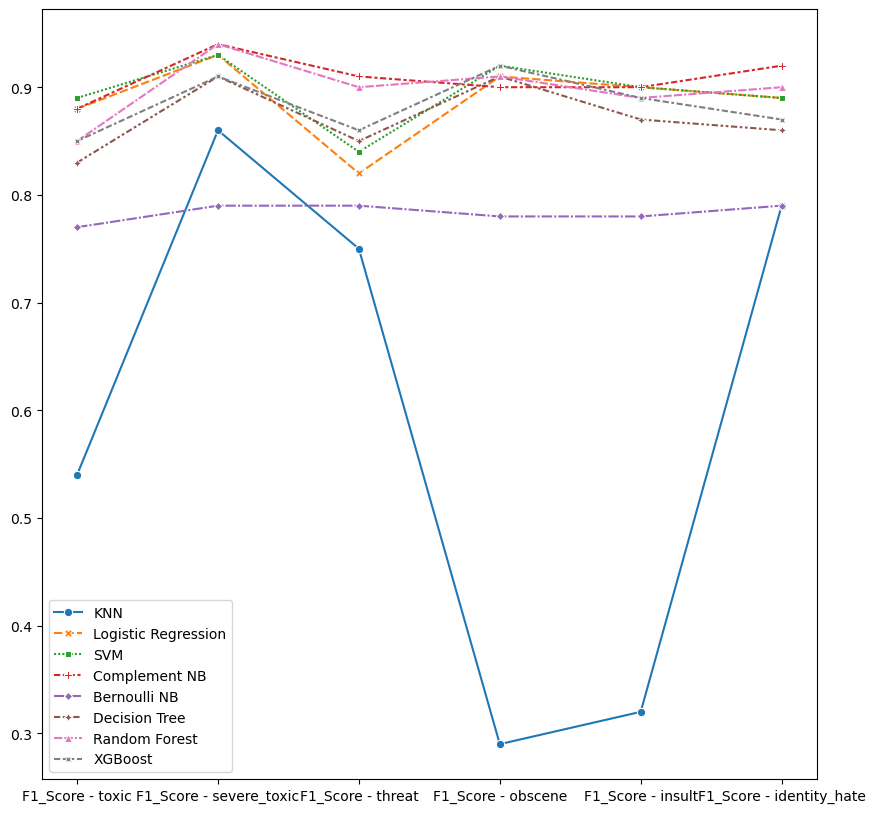

In [53]:
plt.figure(figsize=(10,10))
sns.lineplot(data=result, markers=True)
plt.legend(loc='best')

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

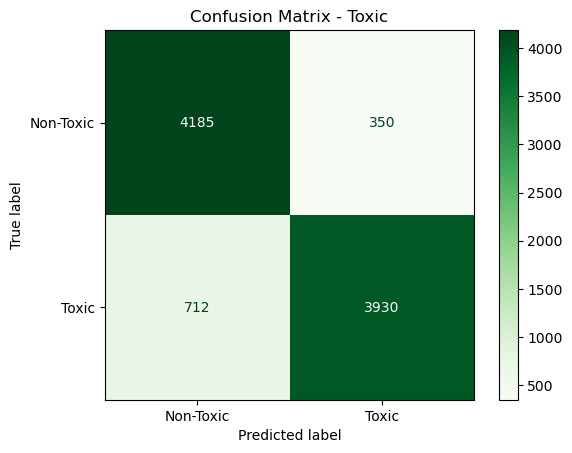

In [89]:
x = df_toxic.comment_text.fillna(' ')
y = df_toxic['toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv1 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv1.fit_transform(x_train)
x_test_scal = tfv1.transform(x_test)
lrt = LogisticRegression()
lrt.fit(x_train_scal, y_train)
y_pred_toxic = lrt.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Toxic', 'Toxic'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Toxic')
plt.show()


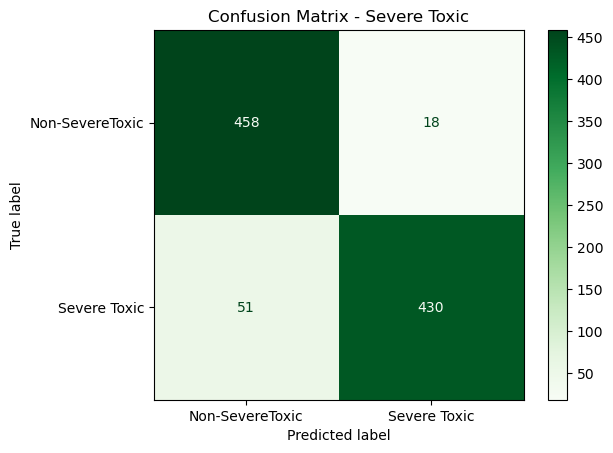

In [100]:
x = df_severe_toxic.comment_text.fillna(' ')
y = df_severe_toxic['severe_toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv2 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv2.fit_transform(x_train)
x_test_scal = tfv2.transform(x_test)
lrst = LogisticRegression()
lrst.fit(x_train_scal, y_train)
y_pred_toxic = lrst.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-SevereToxic', 'Severe Toxic'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Severe Toxic')
plt.show()

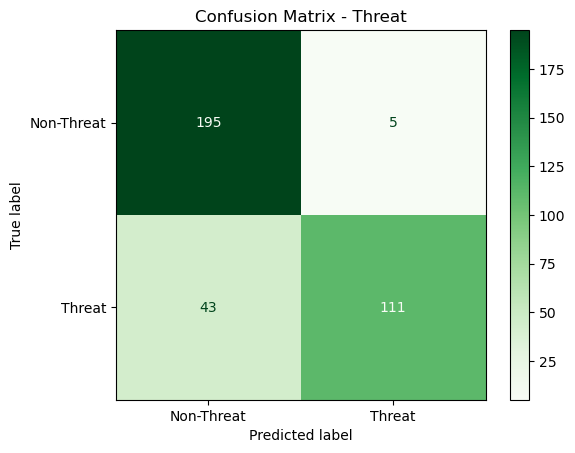

In [102]:
x = df_threat.comment_text.fillna(' ')
y = df_threat['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv3 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv3.fit_transform(x_train)
x_test_scal = tfv3.transform(x_test)
lrth = LogisticRegression()
lrth.fit(x_train_scal, y_train)
y_pred_toxic = lrth.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Threat', 'Threat'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Threat')
plt.show()

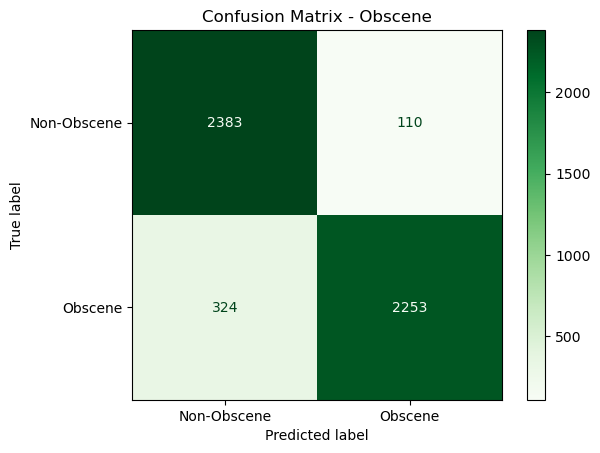

In [104]:
x = df_obscene.comment_text.fillna(' ')
y = df_obscene['obscene']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv4 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv4.fit_transform(x_train)
x_test_scal = tfv4.transform(x_test)
lro = LogisticRegression()
lro.fit(x_train_scal, y_train)
y_pred_toxic = lro.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Obscene', 'Obscene'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Obscene')
plt.show()

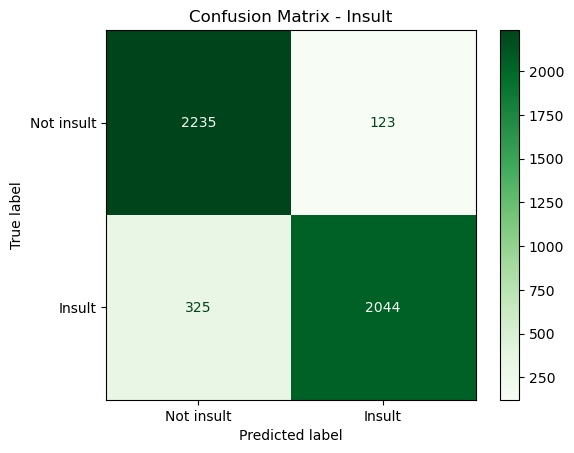

In [106]:
x = df_insult.comment_text.fillna(' ')
y = df_insult['insult']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv5 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv5.fit_transform(x_train)
x_test_scal = tfv5.transform(x_test)
lri = LogisticRegression()
lri.fit(x_train_scal, y_train)
y_pred_toxic = lri.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not insult', 'Insult'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Insult')
plt.show()

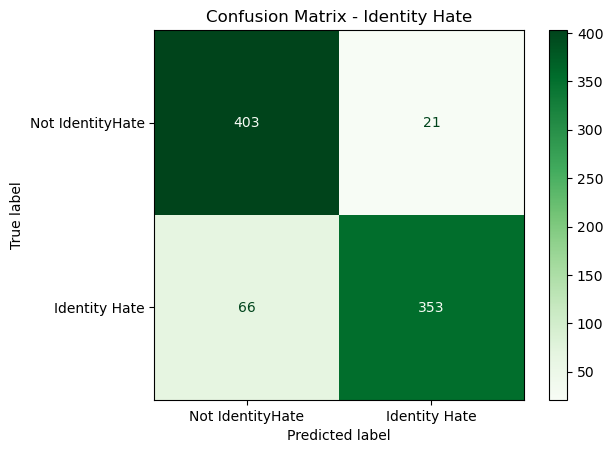

In [108]:
x = df_identity_hate.comment_text.fillna(' ')
y = df_identity_hate['identity_hate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv6 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv6.fit_transform(x_train)
x_test_scal = tfv6.transform(x_test)
lrid = LogisticRegression()
lrid.fit(x_train_scal, y_train)
y_pred_toxic = lrid.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred_toxic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not IdentityHate', 'Identity Hate'])
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Identity Hate')
plt.show()

In [127]:
def getfiles(df, label):
    x = df.comment_text.fillna(' ')
    y = df[label]
    
    tfv_f = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    X_vect = tfv_f.fit_transform(x)

    with open(f'pickel/{label + "_vect"}.pkl', 'wb') as f:
        pickle.dump(tfv_f, f) 
    
    log = LogisticRegression()
    log.fit(X_vect, y)
    
    with open(f'pickel/{label + "_model"}.pkl', 'wb') as f:
        pickle.dump(log, f)

In [128]:
list_c = ['toxic', 'severe_toxic', 'threat', 'obscene', 'insult', 'identity_hate']
list_d = [df_toxic, df_severe_toxic, df_threat, df_obscene, df_insult, df_identity_hate]
for i, j in zip(list_d, list_c):
    getfiles(i, j)